In [0]:
# !pip install newsapi-python
import requests
from io import StringIO
import json
import pandas as pd
import time

In [0]:
# newsapi.get_top_headlines(sources='TechCrunch')

In [0]:
data = json.dumps(newsapi.get_top_headlines(sources='the-wall-street-journal'))

In [0]:
df = pd.read_json(data, orient="index")

In [0]:
df.head(10)

,0
articles,"[{'source': {'id': 'the-wall-street-journal', ..."
status,ok
totalResults,10


In [0]:
from datetime import datetime
print(datetime.now())

2020-03-21 11:25:34.400793


In [0]:
try:
  raise NameError('HiThere')
except NameError:
  print('An exception flew by!')
  raise

An exception flew by!


NameError: ignored

In [0]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    """Print 'Hello, world!' as the response body."""
    return 'Hello, world!'

## Google Trends

In [0]:
import requests
from io import StringIO
import json
import pandas as pd
import time

def google_trends(keyword):
    google_explore_api_url = 'https://trends.google.com/trends/api/explore'
    google_explore_url = 'https://trends.google.com/trends/explore'
    sess_headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'}
    sess = requests.Session()
    params = {
        'q': keyword,
        'geo': 'US'
    }
    sess.get(google_explore_url,params=params,headers=sess_headers)
    params = {
        'hl': 'en-US',
        'tz': '-60',
        'req': '{"comparisonItem":[{"keyword":"%s","geo":"US","time":"today 12-m"}],"category":0,"property":""}'%keyword,
        'tz': '-60',
    }
    r = sess.get(google_explore_api_url,params=params,headers=sess_headers)
    token = json.loads(r.text.split(')]}\'\n')[-1])['widgets'][0]['token']
    print(token)

    # passed one year
    s2=time.strftime('%Y-%m-%d')
    print(s2)
    year_bit = int(s2[:4])
    s1 = str(year_bit-1)+s2[4:]
    print(s1)

    google_explore_csv_url = 'https://trends.google.com/trends/api/widgetdata/multiline/csv'
    params = {
        'req': '{"time":"%s %s","resolution":"WEEK","locale":"en-US","comparisonItem":[{"geo":{"country":"US"},"complexKeywordsRestriction":{"keyword":[{"type":"BROAD","value":"%s"}]}}],"requestOptions":{"property":"","backend":"IZG","category":0}}'%(s1,s2,keyword),
        'token':token,
        'tz': -60
    }
    r = sess.get(google_explore_csv_url,params=params,headers=sess_headers)

    data = StringIO(r.text)
    df = pd.read_csv(data)
    return df



In [0]:
df = google_trends("Fed")
df = df[1:]

df.head()

APP6_UEAAAAAXnimR-QrspZll7GrMETuVWIBeqSjBz6X
2020-03-22
2019-03-22


,Category: All categories
2019-03-24,41
2019-03-31,41
2019-04-07,42
2019-04-14,41
2019-04-21,42


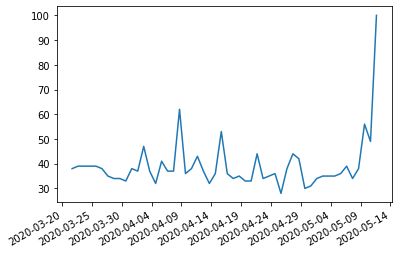

In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

np.random.seed(1)

N = 100
y = np.random.rand(N)

now = dt.datetime.now()
then = now + dt.timedelta(days=52)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(days,df['Category: All categories'])
plt.gcf().autofmt_xdate()
plt.show()

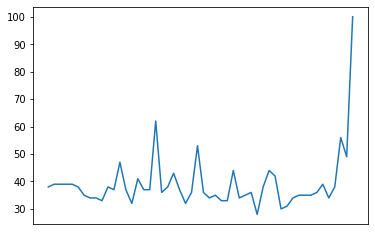

In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

x_values = df.index
y_values = df['Category: All categories']

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")

ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator()


ax.xaxis.set_major_locator(locator)

plt.plot(x_values, y_values)

In [0]:
df.head()

,time,value
0,0,0.848814
1,1,2.288891
2,2,3.360443
3,3,3.508284
4,4,3.670384


## News API

In [9]:
import requests
url = ('http://newsapi.org/v2/top-headlines?'
       'country=us&'
       'source=TechCruch&'
       'apiKey=7417491a101e4ec3a8219b263f028ff7')
response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 38, 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': 'Raphael Satter', 'title': 'Exclusive: Elite hackers target WHO as coronavirus cyberattacks spike - Reuters', 'description': 'Elite hackers tried to break into the World Health Organization earlier this month, sources told Reuters, part of what a senior agency official said was a more than two-fold increase in cyberattacks.', 'url': 'https://www.reuters.com/article/us-health-coronavirus-who-hack-exclusive-idUSKBN21A3BN', 'urlToImage': 'https://s3.reutersmedia.net/resources/r/?m=02&d=20200323&t=2&i=1507194536&w=1200&r=LYNXMPEG2M1VK', 'publishedAt': '2020-03-23T22:42:09Z', 'content': 'WASHINGTON/LONDON (Reuters) - Elite hackers tried to break into the World Health Organization earlier this month, sources told Reuters, part of what a senior agency official said was a more than two-fold increase in cyberattacks. \r\nWHO Chief Information Secur… [+3753 chars]'}, {'source': {'id': 'as

In [0]:
url = ('http://newsapi.org/v2/top-headlines?'
      'q=%Markets&'
      'apiKey=7417491a101e4ec3a8219b263f028ff7')
response = requests.get(url)  
json_data = json.loads(response.text)['articles'] 

In [15]:
len(json_data)

0

In [0]:
import datetime
def get_access_time(json_data):
  for news in json_data:
    news['Access_Time'] = datetime.datetime.now()
  return json_data

In [0]:
from pandas.io.json import json_normalize
def getNewsKeyword(keyword):
  url = ('http://newsapi.org/v2/top-headlines?'
       'q=%s&'
       'apiKey=7417491a101e4ec3a8219b263f028ff7'%keyword)
  
  response = requests.get(url)  
  json_data = json.loads(response.text)['articles']  
  res = get_access_time(json_data)
  data = json_normalize(res, max_level=2)
  return data

In [0]:
data = getNewsKeyword('Trump')


In [22]:
data.head()

,author,title,description,url,urlToImage,publishedAt,content,Access_Time,source.id,source.name
0,Trevor Hunnicutt,Biden battles for attention as coronavirus thr...,Joe Biden's presidential campaign installed a ...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s2.reutersmedia.net/resources/r/?m=02&...,2020-03-24T00:12:46Z,(Reuters) - Joe Biden’s presidential campaign ...,2020-03-24 00:37:54.970912,reuters,Reuters
1,Fox News,Trump tells Senate to stop playing 'partisan p...,President Trump demanded on Monday that the Se...,https://www.foxnews.com/politics/trump-tells-s...,https://cf-images.us-east-1.prod.boltdns.net/v...,2020-03-24T00:09:23.2314917Z,Get all the latest news on coronavirus and mor...,2020-03-24 00:37:54.970926,fox-news,Fox News
2,Rebecca Kheel,Trump administration slashes Afghan aid after ...,The Trump administration is cutting $1 billion...,http://thehill.com/policy/defense/489140-trump...,https://thehill.com/sites/default/files/pompeo...,2020-03-23T23:58:31Z,The Trump administration is cutting $1 billion...,2020-03-24 00:37:54.970927,the-hill,The Hill
3,Fox News,Fox News hosting virtual coronavirus town hall...,Fox News Channel is hosting a special two-hour...,https://www.foxnews.com/media/fox-news-coronav...,https://static.foxnews.com/foxnews.com/content...,2020-03-23T23:53:04.1286036Z,Fox News Channel is hosting a two-hour virtual...,2020-03-24 00:37:54.970928,fox-news,Fox News
4,Steve Holland,Trump suggests he may scale back closures soon...,President Donald Trump said on Monday he is co...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-03-23T23:52:23Z,WASHINGTON (Reuters) - President Donald Trump ...,2020-03-24 00:37:54.970929,reuters,Reuters


In [0]:
import datetime
def dfClean(data):
  df = data[['source.name','title', 'publishedAt']]
  #clean datetime
  df['publishedAt'] = df['publishedAt'].str.slice(0, 16)
  df['publishedAt'] = df['publishedAt'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M'))
  #remove duplicates
  df = df.drop_duplicates(subset='title')
  return df

In [0]:
res = dfClean(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
res = res.sort_values(by='publishedAt', ascending=False)
res.head()

,source.name,title,publishedAt
0,Fox News,Fauci cites Trump travel restrictions as possi...,2020-03-22 19:52:00
1,Google News,Cuomo pleads for Trump to nationalize coronavi...,2020-03-22 19:23:00
2,Fox News,Trump rips 3 big papers over virus,2020-03-22 18:07:00
3,Fox News,Trump’s coronavirus response gets mixed review...,2020-03-22 18:07:00
4,Vice News,New York State Governor Andrew Cuomo Is Urging...,2020-03-22 17:55:00


In [0]:
res = res.rename(columns={'source.name':'News_Source', 'title':'Title', 'publishedAt':'Pubulished_At'})

In [0]:
res.head()

,News_Source,Title,Pubulished_At
0,Google News,'I'm gonna go to work': How Andrew Cuomo and h...,2020-03-22 12:42:00
2,Newsweek,Biden Campaign Accuses Trump Of Trying to 'Rew...,2020-03-22 12:04:00
3,The Hill,"Trump gets polling boost, but will it last? | ...",2020-03-22 12:01:00
4,Associated Press,Trump's fate tied to an unknown: how fast econ...,2020-03-22 11:57:00
5,Google News,Maryland Gov. Larry Hogan emerges as a leader ...,2020-03-22 11:24:00


In [0]:
MXYlyh@429
MXYlyh@429

def getNews(source):
  url = ('http://newsapi.org/v2/top-headlines?'
       'q=%s&'
       'apiKey=7417491a101e4ec3a8219b263f028ff7'%source)
  
  response = requests.get(url)  
  json_data = json.loads(response.text)['articl=es']  
  data = json_normalize(json_data, max_level=2)
  return data


def topNews(sources):
  frames = [ getNews(s) for s in sources ]
  df = pd.concat(frames, axis=0, ignore_index=True)
  return df

In [0]:
sources = ['Reuters', 'cnbc', 'Bloomberg', 'TechCrunch', 'the-wall-street-journal', 'cnn', 'bbc-news', 'techradar']

data = topNews(sources)

In [0]:
data.head()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Steve Gorman,Coronavirus stay-at-home directives multiply i...,New Jersey's governor was expected on Saturday...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-03-21T10:44:56Z,(Reuters) - New Jersey’s governor was expected...,reuters,Reuters
1,Sarah N. Lynch,Social work from a social distance: Coronaviru...,Social distancing during the coronavirus pande...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-03-21T10:18:35Z,WASHINGTON (Reuters) - Social distancing durin...,reuters,Reuters
2,Reuters Editorial,"Factbox: Coronavirus deaths pass 5,400 worldwide","Some 145,594 people have been infected by the ...",http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s2.reutersmedia.net/resources/r/?m=02&...,2020-03-21T09:54:33Z,"(Reuters) - Some 145,594 people have been infe...",reuters,Reuters
3,Reuters Editorial,Country singer Kenny Rogers dies aged 81,Grammy-winning country singer Kenny Rogers die...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s2.reutersmedia.net/resources/r/?m=02&...,2020-03-21T07:28:31Z,(Reuters) - Grammy-winning country singer Kenn...,reuters,Reuters
4,Reuters Editorial,"Starbucks closes most U.S., Canada cafes, move...",Starbucks Corp said on Friday it will close mo...,http://feeds.reuters.com/~r/reuters/topNews/~3...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-03-21T06:18:07Z,(Reuters) - Starbucks Corp (SBUX.O) said on Fr...,reuters,Reuters


In [0]:
url = ('http://newsapi.org/v2/top-headlines?'
      'sources=TechCrunch&'
      'apiKey=7417491a101e4ec3a8219b263f028ff7')
response = requests.get(url)  

json_data = json.loads(response.text)['articles']  
json_data[1]


{'author': 'Kirsten Korosec',
 'content': 'GM said Friday that it is working with Ventec Life Systems to help increase production of respiratory care products such as ventilators that are needed by a growing number of hospitals as the COVID-19 pandemics spreads throughout the U.S.\r\nThe partnership is … [+1687 chars]',
 'description': 'GM said Friday that it is working with Ventec Life Systems to help increase production of respiratory care products such as ventilators that are needed by a growing number of hospitals as the COVID-19 pandemics spreads throughout the U.S. The partnership is p…',
 'publishedAt': '2020-03-21T01:18:04Z',
 'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'title': 'GM and Ventec Life Systems partner to ramp up production of ventilators',
 'url': 'https://techcrunch.com/2020/03/20/gm-and-ventec-life-systems-partner-to-ramp-up-production-of-ventilators/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/01/gettyimages-629982546.jpg?w=601'}

In [0]:
url = ('https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?'
       'data=longtermrateYear&year=2020')
response = requests.get(url)  

json_data = json.loads(response.text)
json_data[1]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=longtermrateYear&year=2020

SyntaxError: ignored

In [0]:
content1 = json_data[1]['content']

In [0]:
import urllib.request

url = json_data['articles'][5]['url']

data1 = urllib.request.urlopen(url).read()
data1 = data1.decode('UTF-8')
start1 = data1.find(r'<div class="article-content">')
end1 = data1.find(r'<footer class="article-footer">')


content1 = data1[start1:end1]

print(content1)

TypeError: ignored

In [0]:
for line in open(path, encoding='UTF-8'): 
    data_list = json.loads(line)                 # 读取每一行，将每一行读取成为json文件
    data_df = pd.DataFrame(data_list, index=[0]) # 将每一行转成data frame的形式
    df_empty = df_empty.append(data_df)  

def flatten_json(df,column_name):
    basic = []
    for i in df[column_name]:
        basic.append(json.loads(i))
    flatten_columns = pd.DataFrame(basic)
    df = pd.concat([df,flatten_columns],axis=1)
    df = df.drop([column_name],axis=1)
    return df

In [0]:
#json/dict > list > dict
response.json()['articles'][1].keys()

def getNews(response):
  df = pd.DataFrame()

  return df

In [0]:
def getFinanceHistoricalStockFromByma(tickerList): 
     dataFrameHistorical = pd.DataFrame()  
     for item in tickerList:
         url = 'https://www.byma.com.ar/wp-admin/admin-ajax.php?action=get_historico_simbolo&simbolo=' + item + '&fecha=01-02-2018'
         response = requests.get(url)
         if response.content : print 'ok info Historical Stock'
         data = response.json()                
         dfItem = jsonToDataFrame(data)                
         dataFrameHistorical = dataFrameHistorical.append(dfItem, ignore_index=True)    
    return dataFrameHistorical

def jsonToDataFrame(jsonStr):    
     return json_normalize(jsonStr) 

In [0]:
data = json.loads(url.read().decode())
df = pd.DataFrame(data)

## Dataframe schema: date, title, content, key words joining

In [0]:

url = 'http://newsapi.org/v2/top-headlines?q=trump&apiKey=7417491a101e4ec3a8219b263f028ff7'
resp = requests.get(url)


## Keywords

In [0]:
pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=d51512c4dbb24e79dd8cf33537e5799305d66050d6aed414c081c32c3cfbcaa1
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [0]:
pd.set_option('display.max_colwidth', -1)

In [0]:
content1

'GM said Friday that it is working with Ventec Life Systems to help increase production of respiratory care products such as ventilators that are needed by a growing number of hospitals as the COVID-19 pandemics spreads throughout the U.S.\r\nThe partnership is … [+1687 chars]'

In [0]:
content2=

SyntaxError: ignored

In [0]:
from rake_nltk import Rake

r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.

r.extract_keywords_from_text('The White House has announced a flurry of a§ctions it says are responding to the coronavirus pandemic, but a closer look reveals that some arent what they seem or remain to be executed.')

r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.

['closer look reveals',
 'white house',
 'coronavirus pandemic',
 'seem',
 'says',
 'responding',
 'remain',
 'flurry',
 'executed',
 'arent',
 'announced',
 'actions']

In [0]:
import requests
from xml.etree import ElementTree
url = ('http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202019')
response = requests.get(url)
root = ElementTree.fromstring(response.content)

# def getYieldCurve():
#     url = ('http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202019')
#     response = requests.get(url)
#     tree = ElementTree.fromstring(response.content)

#     pass

In [0]:
for node in root: 
    res = []
    res.append(node.attrib.get(df_cols[0]))
    for el in df_cols[1:]: 
        if node is not None and node.find(el) is not None:
            res.append(node.find(el).text)
        else: 
            res.append(None)
    rows.append({df_cols[i]: res[i] 
                  for i, _ in enumerate(df_cols)})

out_df = pd.DataFrame(rows, columns=df_cols)
    
return out_df

NameError: ignored

In [0]:
from xml.etree import ElementTree as ET

# #Load xml file data
# tree = ET.parse(path_to_xml_file)
# root = tree.getroot()

#Grab list of column names
aviationdata_column_names = root.attrib.keys()             
#Create empty dataframe   
aviationdata_df = pd.DataFrame(columns=aviationdata_column_names)

#Loop through tree and append to dataframe
for i in range(0,len(root[0])-1):
    new_row = pd.Series(root[0][i].attrib)
    new_row.name = i
    aviationdata_df = aviationdata_df.append(new_row)

In [0]:
aviationdata_df.head()

,{http://www.w3.org/XML/1998/namespace}base


In [0]:
data = []
for el in root.iterfind('./*'):
    for i in el.iterfind('*'):
      data.append(dict(i.items()))

df = pd.DataFrame(data)